### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [16]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('../data/mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


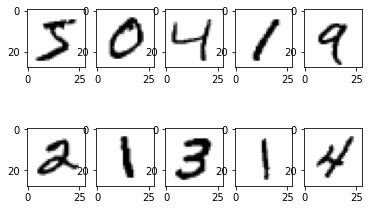

In [35]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
#     im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(tset[0][i], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [48]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1
    
print(train_in)
print(train_tgt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Initialise the MLP classifier 

In [49]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [50]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 0.1, 1000)

Iteration:  0  Error:  4095.0724846166563
Iteration:  100  Error:  4052.9489631159704
Iteration:  200  Error:  4037.049470508421
Iteration:  300  Error:  4023.5528551809994
Iteration:  400  Error:  4000.168170027255
Iteration:  500  Error:  3961.4134661419066
Iteration:  600  Error:  3908.3418805248384
Iteration:  700  Error:  3849.439450625232
Iteration:  800  Error:  3788.357907107344
Iteration:  900  Error:  3724.6965714042904


In [51]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[ 85.   2.  95.  89.  41.  57.  83.   1.  44.   6.]
 [  0.   9.   2.   6.  16.   6.   2.   1.   7.  18.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   3.   6.   5.  23.   5.   2.   1.  25.   9.]
 [  0. 112.  13.   7.  30.  19.   0.  96.  13.  61.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The accuracy is  19.2


array([[ 85.,   2.,  95.,  89.,  41.,  57.,  83.,   1.,  44.,   6.],
       [  0.,   9.,   2.,   6.,  16.,   6.,   2.,   1.,   7.,  18.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   3.,   6.,   5.,  23.,   5.,   2.,   1.,  25.,   9.],
       [  0., 112.,  13.,   7.,  30.,  19.,   0.,  96.,  13.,  61.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [ ]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [ ]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [53]:
best_sizes = [784,30,30,10]
best_beta = 5
best_momentum = 0.9
best_lr = 0.01 # best learning rate
best_niterations = 15000
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4105.766704984189
Iteration:  100  Error:  4045.8059681581813
Iteration:  200  Error:  3979.848089344102
Iteration:  300  Error:  3867.7013835894295
Iteration:  400  Error:  3717.4474631764315
Iteration:  500  Error:  3541.671015442014
Iteration:  600  Error:  3322.713022160657
Iteration:  700  Error:  3049.2012542320986
Iteration:  800  Error:  2746.7560128396913
Iteration:  900  Error:  2446.3304317848456
Iteration:  1000  Error:  2168.145727924578
Iteration:  1100  Error:  1931.3991172834828
Iteration:  1200  Error:  1739.046428737461
Iteration:  1300  Error:  1581.4540324965435
Iteration:  1400  Error:  1451.7613563851837
Iteration:  1500  Error:  1344.704913656256
Iteration:  1600  Error:  1253.164865601632
Iteration:  1700  Error:  1168.6622548872883
Iteration:  1800  Error:  1085.7978654793283
Iteration:  1900  Error:  1008.2193367989986
Iteration:  2000  Error:  939.9742347378715
Iteration:  2100  Error:  881.2606160185128
Iteration:  2200  Error:  830.87

array([[ 82.,   0.,   0.,   1.,   0.,   1.,   3.,   0.,   0.,   0.],
       [  0., 125.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.],
       [  0.,   1., 100.,   2.,   1.,   1.,   2.,   3.,   3.,   0.],
       [  0.,   0.,   1.,  97.,   0.,   3.,   1.,   1.,   3.,   0.],
       [  0.,   0.,   1.,   0., 100.,   0.,   0.,   0.,   2.,   3.],
       [  1.,   0.,   0.,   5.,   0.,  76.,   1.,   0.,   1.,   0.],
       [  2.,   0.,   1.,   0.,   1.,   1.,  80.,   0.,   0.,   0.],
       [  0.,   0.,   5.,   1.,   1.,   1.,   0.,  90.,   2.,   0.],
       [  0.,   0.,   8.,   1.,   1.,   3.,   0.,   1.,  78.,   2.],
       [  0.,   0.,   0.,   0.,   6.,   1.,   0.,   2.,   0.,  89.]])

In [54]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)